In [2]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from LSS.common_tools import goodz_infull

In [3]:
tracer = "LRG"
galactic_cap = "NGC"
# hdd_weights = Table.read(f"/dvs_ro/cfs/cdirs/desi/survey/catalogs/Y1/LSS/iron/LSScats/v1.5/{tracer}_{galactic_cap}_clustering.dat.fits")
hdd_weights = Table.read(f"/pscratch/sd/d/dchebat/imsys_fastload/Y1/LSS/iron/LSScats/v1.5/LRG_full_HPmapcut.dat.fits")
clusmask = ((hdd_weights['ZWARN'] != 999999) & goodz_infull(tp=tracer[:3], dz=hdd_weights, zcol="Z_not4clus"))
hdd_weights = hdd_weights[clusmask]
# disk_weights = hdd_weights["WEIGHT_SYS"][hdd_weights["PHOTSYS"] == 'N']
zranges = [(0.4,0.6),(0.6,0.8),(0.8,1.1)]
zranges_disk_masks = [(hdd_weights["PHOTSYS"] == 'N') & (hdd_weights["Z_not4clus"] > zrange[0]) & (hdd_weights["Z_not4clus"] < zrange[1]) for zrange in zranges]
zranges_disk_weights = [hdd_weights["WEIGHT_IMLIN"][mask] for mask in zranges_disk_masks]

pipeline = np.load("/global/homes/d/dchebat/LSS/LRGtest.npy")

In [4]:
oldmeth = np.load("LRG_NGC_notjax.npy")
newmeth = np.load("LRG_NGC_yesjax_fromfull_with15hpmap.npy")

Text(0.5, 0.98, 'LRG North')

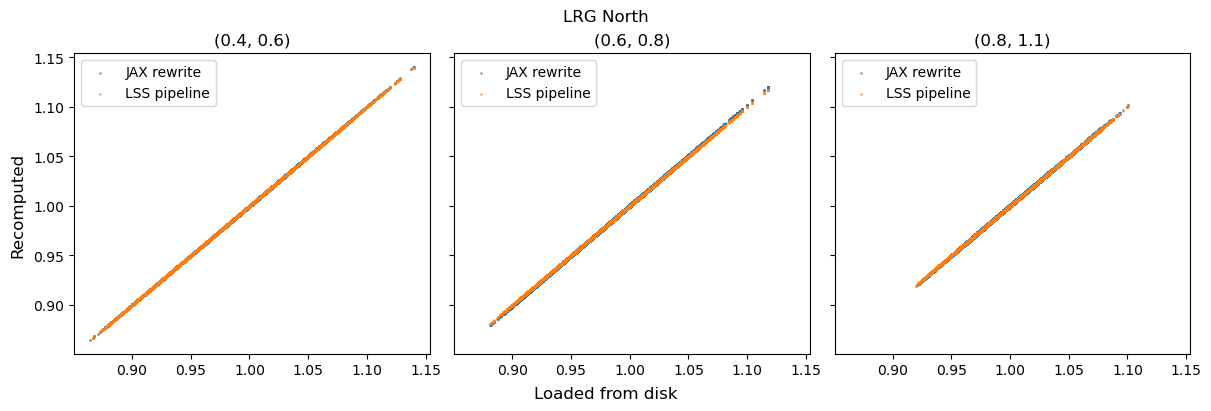

In [5]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, layout="constrained", figsize=(12, 4))
for i in range(3):
    axes[i].scatter(zranges_disk_weights[i], newmeth[(newmeth != 1.) & zranges_disk_masks[i]], label="JAX rewrite", s=1., alpha=0.5)
    axes[i].scatter(zranges_disk_weights[i], pipeline[zranges_disk_masks[i]], label="LSS pipeline", s=1., alpha=0.5)
    axes[i].set_title(zranges[i])
    axes[i].legend()
    # axes[i].axline((1, 1), slope=1, color='k')
fig.supxlabel("Loaded from disk")
fig.supylabel("Recomputed")
fig.suptitle("LRG North")

In [13]:
withdiffrandoms = [np.load(f"LRG_NGC_yesjax_fromfull_random_{i}.npy") for i in range(8)]

/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20250526-1.0.0/conda/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20250526-1.0.0/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


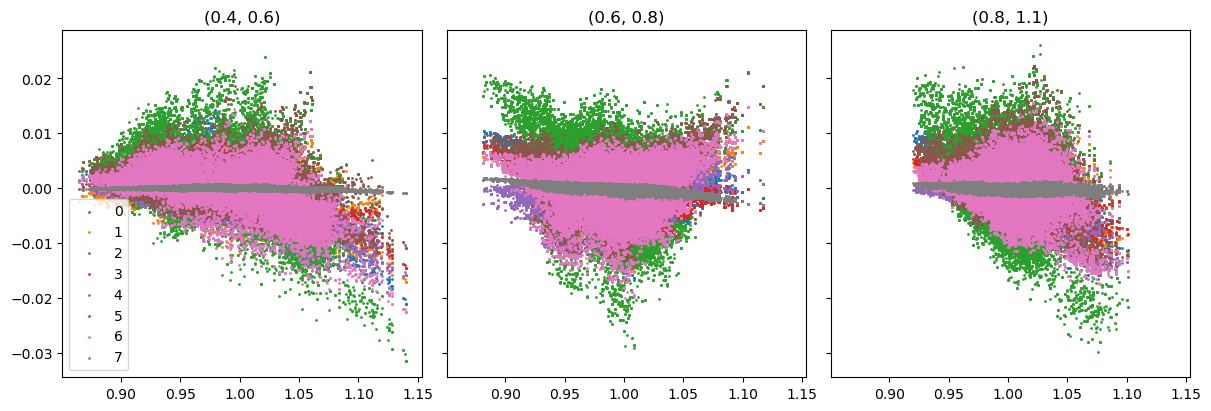

In [15]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, layout="constrained", figsize=(12, 4))

for i in range(3):
    # axes[i].scatter(zranges_disk_weights[i], zranges_disk_weights[i] - newmeth[(newmeth != 1.) & zranges_disk_masks[i]], label="JAX rewrite", s=1., alpha=0.5)
    for n, rand in enumerate(withdiffrandoms[::-1]):
        axes[i].scatter(zranges_disk_weights[i], zranges_disk_weights[i] - rand[zranges_disk_masks[i]], s=1., label=n)
    # axes[i].scatter(zranges_disk_weights[i], zranges_disk_weights[i] - pipeline[zranges_disk_masks[i]], label="LSS pipeline", s=1., alpha=0.5)
    axes[i].set_title(zranges[i])
axes[0].legend()

/tmp/ipykernel_1772501/2258983710.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()


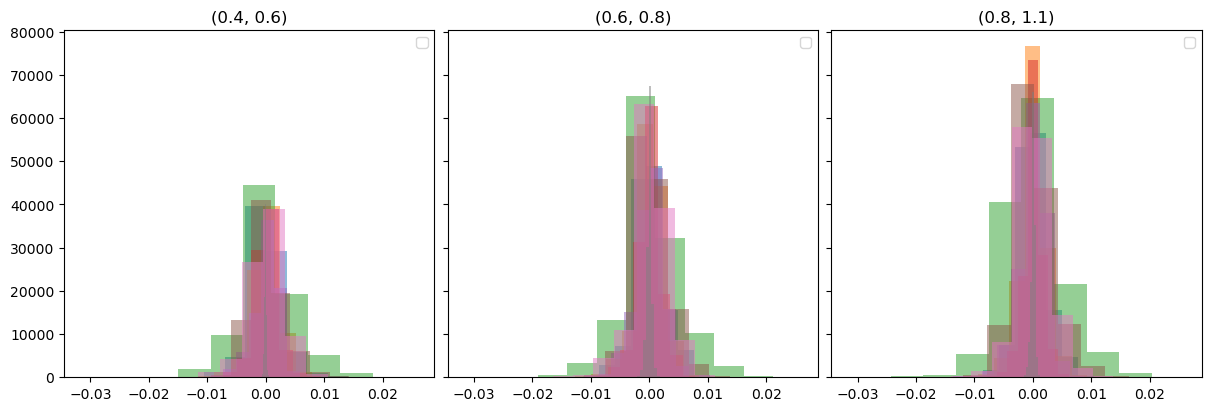

In [11]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, layout="constrained", figsize=(12, 4))
for i in range(3):
    # axes[i].hist(zranges_disk_weights[i], zranges_disk_weights[i] - newmeth[(newmeth != 1.) & zranges_disk_masks[i]], label="JAX rewrite", s=1., alpha=0.5)
    for rand in withdiffrandoms[::-1]:
        axes[i].hist(zranges_disk_weights[i] - rand[zranges_disk_masks[i]],alpha=0.5)
    # axes[i].scatter(zranges_disk_weights[i], zranges_disk_weights[i] - pipeline[zranges_disk_masks[i]], label="LSS pipeline", s=1., alpha=0.5)
    axes[i].set_title(zranges[i])
    axes[i].legend()

# Compare regression results

In [19]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [25]:
dir_notjax = Path("/pscratch/sd/d/dchebat/imsys_fastload/Y1/LSS/iron/LSScats/v1.5/")
dir_yesjax = dir_notjax / "yesjax_fits"

notjax = {}
yesjax = {}

for txtfilepath in dir_notjax.glob("*linfitparam.txt"):
    with open(txtfilepath, 'r') as file:
            lines = file.readlines()
    pars_dict = {}
    for line in lines:
        name, value = line.strip().split(' ')
        pars_dict[name] = float(value)
    notjax[txtfilepath.stem] = pars_dict

    with open(dir_yesjax/txtfilepath.name, 'r') as file:
            lines = file.readlines()
    pars_dict = {}
    for line in lines:
        name, value = line.strip().split(' ')
        pars_dict[name] = float(value)
    yesjax[txtfilepath.stem] = pars_dict

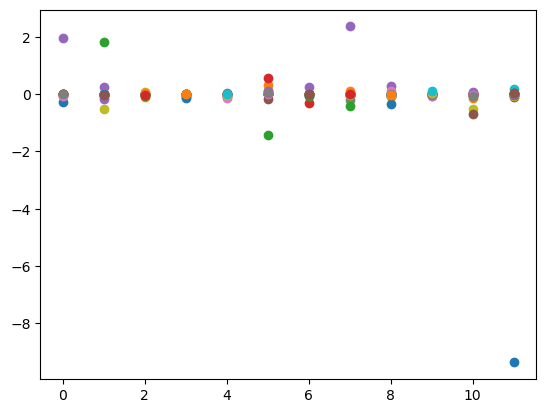

In [26]:
for coeffnum, coeffname in enumerate(yesjax["LRG_N_0.30.4_linfitparam"].keys()):
    for reg_zbin in yesjax.keys():
        plt.scatter(coeffnum, (notjax[reg_zbin][coeffname] - yesjax[reg_zbin][coeffname])/notjax[reg_zbin][coeffname])

In [27]:
notjax_weights = np.load("/global/homes/d/dchebat/LSSv2_modif/LRG_timing_notjax.npy")
yesjax_weights = np.load("/global/homes/d/dchebat/LSSv2_modif/LRG_timing_yesjax.npy")

In [28]:
(notjax_weights != 1.).sum(), (yesjax_weights != 1.).sum(),

(2314550, 2314552)

In [30]:
(yesjax_weights != 1.).sum() / yesjax_weights.size

0.9738236857041519

In [ ]:
(notjax_weights - yesjax_weights).std()

0.000613653583518996